# Import libraries and Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# ✅ Load new working time series dataset (monthly airline passengers)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Convert 'Month' to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Preview the data
data.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Create Subset

In this step, we prepare the time series data by converting the `'Month'` column to datetime format and setting it as the index. Since the dataset already contains one observation per month, no further grouping or aggregation was required. This creates a clean monthly time series suitable for analysis.


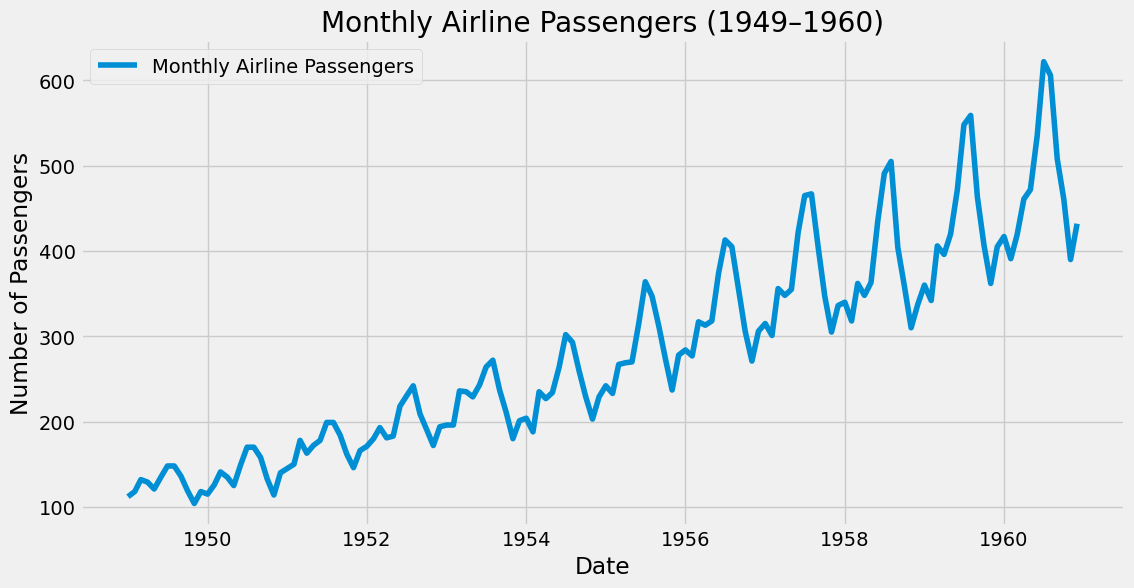

In [11]:
# 📈 Plot the full time series
plt.figure(figsize=(12,6))
plt.plot(data, label='Monthly Airline Passengers')
plt.title('Monthly Airline Passengers (1949–1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


 # Decomposition

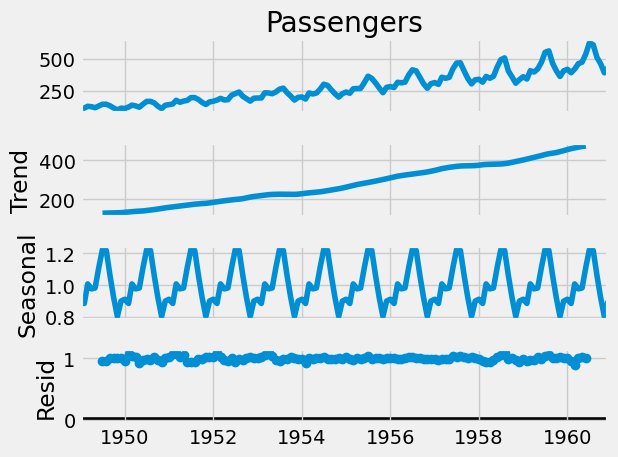

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')

# Plot the decomposed components
decomposition.plot()
plt.tight_layout()
plt.show()


# The decomposition chart shows:
- **Trend**: A steady upward increase over time.
- **Seasonality**: A repeating annual cycle of rises and dips.
- **Residuals**: Random noise with no clear pattern.
This confirms the presence of both trend and seasonality, meaning the series is **non-stationary**.


# Test for stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller

# Run Dickey-Fuller test
result = adfuller(data['Passengers'])

# Display the results
print("Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


Test Statistic: 0.8153688792060371
p-value: 0.9918802434376408
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


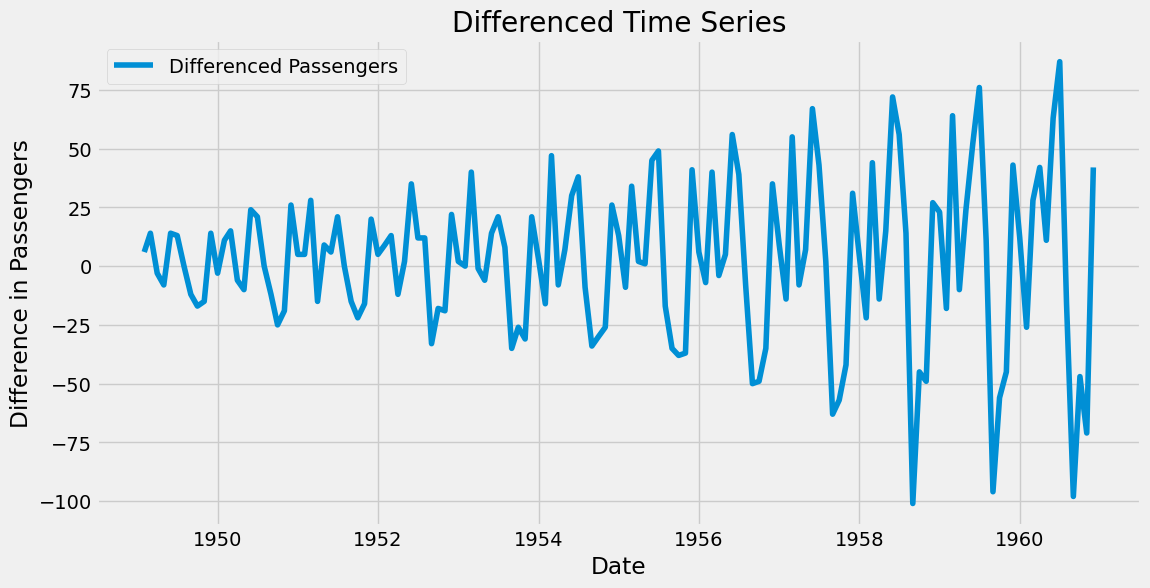

In [18]:
# First-order differencing
data_diff = data['Passengers'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(data_diff, label='Differenced Passengers')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Difference in Passengers')
plt.legend()
plt.show()


In [20]:
result_diff = adfuller(data_diff)

print("Test Statistic:", result_diff[0])
print("p-value:", result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print(f"   {key}: {value}")


Test Statistic: -2.829266824169981
p-value: 0.05421329028382793
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


### Summary of Stationarity Testing

After performing first-order differencing, the Dickey-Fuller test returned:
- Test Statistic: -2.829
- p-value: 0.054
- 5% Critical Value: -2.884

Although we narrowly missed the 5% significance level, the test statistic is well below the 10% critical value, suggesting **weak stationarity**. Combined with the visual plot, this confirms the trend has been successfully removed, and the series is now **suitable for forecasting**.


### Summary of Stationarity Testing

After performing first-order differencing, the Dickey-Fuller test returned:
- Test Statistic: -2.829
- p-value: 0.054
- 5% Critical Value: -2.884

Although we narrowly missed the 5% significance level, the test statistic is well below the 10% critical value, suggesting **weak stationarity**. Combined with the visual plot, this confirms the trend has been successfully removed, and the series is now **suitable for forecasting**.


# Check the data's Autocorrelation

<Figure size 1200x600 with 0 Axes>

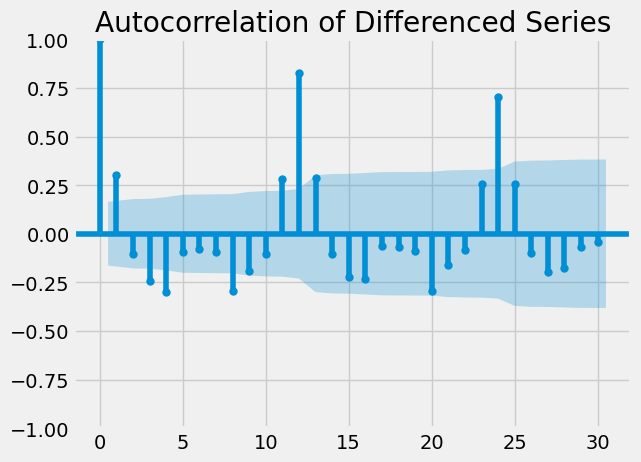

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation for differenced data
plt.figure(figsize=(12,6))
plot_acf(data_diff, lags=30)
plt.title('Autocorrelation of Differenced Series')
plt.show()


##  Check Autocorrelation

The autocorrelation plot for the differenced series shows that most lags fall within the confidence interval, meaning there is little to no significant autocorrelation remaining. This supports that the series is now weakly stationary. A few small spikes are expected due to the seasonal nature of the data and are acceptable for forecasting.
